# Topic Comparison

Compares LDA topics to manual categorization

# Imports

In [1]:
%matplotlib notebook
from collections import defaultdict

import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

from sklearn.externals import joblib
from nltk.probability import FreqDist

import warnings
warnings.filterwarnings('ignore')

# Read in saved model data

In [2]:
data = joblib.load('lda_tf_review.joblib')
list(data.keys())

model = data["model"]
dtm = data["dtm"]
tf_vectorizer = data["vectorizer"]
docs = data["docs"]

# Find predictions for training data

In [3]:
predictions = np.argmax(model.transform(dtm), axis=1)
predictions.shape, len(docs)

((3872,), 3872)

# Analyze Findings

Count labels per topic and vice versa.

In [11]:
report_label2topic = defaultdict(list)
report_topic2label = defaultdict(list)

for idx, d in enumerate(docs):
    d["prediction"] = predictions[idx]
    report_label2topic[d["Label"]].append(d["prediction"])
    report_topic2label[d["prediction"]].append(d["Label"]) 
    
label2topic = {}
for k, v in report_label2topic.items():
    label2topic[k] = FreqDist(v)

topic2label = {}
for k, v in report_topic2label.items():
    topic2label[k] = FreqDist(v)

## Plot Labels found in Topic

In [5]:
def topic_viz(freqdist, topic):
    fix, ax = plt.subplots(figsize=(8,6))
    ax.set_xlabel("Labels")
    ax.set_ylabel("count")
    ax.set_title("Labels in Topic {} ({} documents)".format(topic, sum(freqdist[topic].values())))    
    ax.bar(freqdist[topic].keys(), freqdist[topic].values())
    
    plt.tick_params(axis='x', which='major', labelsize=7)
    plt.xticks(rotation=80)
    plt.tight_layout()


_ = interact(topic_viz, freqdist=fixed(topic2label), topic=sorted(topic2label.keys()))

interactive(children=(Dropdown(description='topic', options=(0, 2, 3, 4, 5, 6, 7, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39), value=0), Output()), _dom_classes=('widget-interact',))

## Plot Topics found in Label

In [14]:
def label_viz(freqdist, label):
    fix, ax = plt.subplots(figsize=(8,6))
    ax.set_xlabel("Topics")
    ax.set_ylabel("count")
    ax.set_title("Topics in {} ({} topics)".format(label, sum(freqdist[label].values())))    
    ax.bar(freqdist[label].keys(), freqdist[label].values())
    
    plt.tick_params(axis='x', which='major', labelsize=7)
    plt.xticks(np.arange(0, 40, 1), rotation=80)
    plt.tight_layout()


_ = interact(label_viz, freqdist=fixed(label2topic), label=sorted(label2topic.keys()))

interactive(children=(Dropdown(description='label', options=('Alarms', 'Angles', 'Angular Stability', 'Cyber Security', 'Data Quality', 'Dynamic Stability', 'Dynamic State Estimation', 'Economics', 'Energy Storage', 'Equipment Health', 'Event Analysis', 'Event Classification', 'Event Detection', 'Excitation Systems', 'Fault Analysis', 'GMD', 'Generator Model Validation', 'Generator Parameter Identification', 'Inertial Estimation', 'Islanding Detection', 'Load Modeling', 'Load Shedding', 'Measurement Techniques', 'Measurement Techniques, Awesome', 'Oscillations', 'Planning', 'Power Quality', 'Safety', 'Small Signal Stability', 'Stability', 'State EStimation', 'State Estimation', 'System Restoration', 'Testing', 'Time Synchronization', 'Topology Identification', 'Transient Stability', 'Visualization', 'Voltage Stability'), value='Alarms'), Output()), _dom_classes=('widget-interact',))

In [49]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from matplotlib import colors
from operator import itemgetter


In [24]:
model.n_components

40

In [30]:
labels = sorted(label2topic.keys())
data = np.zeros((len(labels), model.n_components))

for idx, label in enumerate(labels):
    counts = label2topic[label]
    for topic, count in counts.items():
        data[idx][topic] = count

In [37]:
data.shape

(39, 40)

<IPython.core.display.Javascript object>


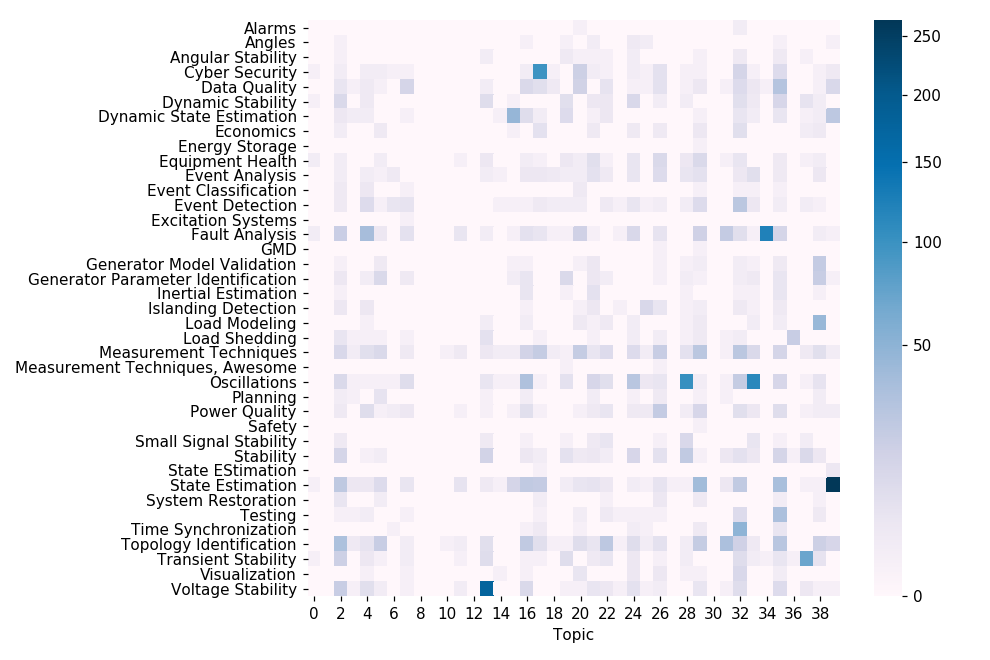

In [72]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(data, ax=ax, yticklabels=labels, cmap="PuBu", norm=colors.PowerNorm(0.5))

ax.set_xlabel("Topic")

plt.tight_layout()
plt.savefig("/Users/benjamin/Dropbox/Screenshots/SGSMA pyLDAViz/topic_distribution.png")